#  Customer Churn In Syria Telecom Company

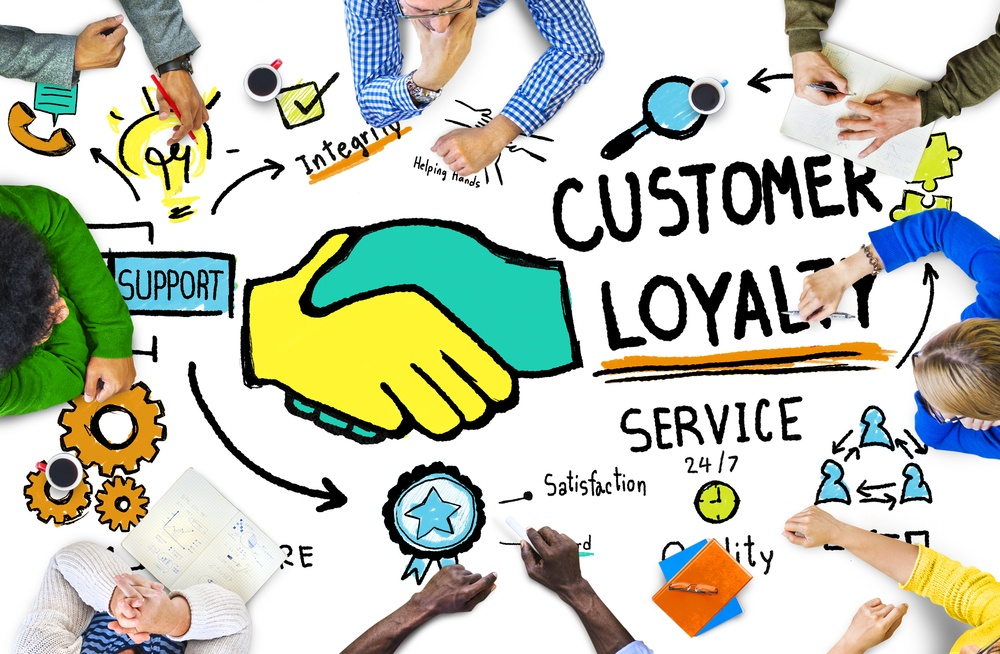

# Project Overview
 Customer churn is defined as the phenomenon where customers discontinue using a service, is a critical challenge for telecommunication companies. This project aims to develop a predictive model to forecast customer churn and identify key features contributing to churn behaviour. The insights gained from this analysis will enable telecom companies to devise effective marketing strategies aimed at customer retention, ultimately enhancing profitability

# Introduction
Customer churn is a critical issue faced by service-based industries like telecommunications, necessitating a deep understanding of customer behavior and churn-contributing factors to implement effective retention strategies. The beginning of a customer-company relationship often feels exciting, akin to a honeymoon period filled with novelty and exploration. However, this initial enthusiasm can diminish over time, particularly after successful onboarding. Marketers sometimes fall into the trap of assuming that once an initial sale is made, subsequent sales will naturally follow, but sustaining customer loyalty demands continuous nurturing and engagement. Merely creating brand awareness or occasional interactions with customers is insufficient for building lasting relationships; instead, proactive and tailored engagement strategies are essential to foster loyalty and combat churn effectively.

## Challenges
 Customer churn often stems from a failure to establish a strong connection with your brand or due to specific events that lead to disengagement. Key causes of customer churn include:

**High Charges:** Excessive pricing or unexpected fees can drive customers away, especially if they perceive the service as not providing sufficient value for the cost.

**Poor Onboarding:** A subpar onboarding experience can leave customers feeling disconnected and unsure about the service or product they've signed up for, leading to early disengagement.

**Weak Relationship Building:** Failing to nurture and maintain relationships with customers can result in a lack of loyalty and an increased likelihood of churn.

**Poor Customer Service:** Inadequate support or unresolved issues can frustrate customers and erode trust in your brand, prompting them to seek alternatives

## Possible Solution
Addressing customer churn is crucial to minimize hidden costs and maximize business sustainability, especially considering that retaining customers is typically more cost-effective than acquiring new ones. The key solutions to reduce churn rates include:

**Quality Customer Service:** Providing exceptional customer support and promptly resolving issues can significantly enhance customer satisfaction and loyalty.

**Affordable Charges:** Offering competitive and transparent pricing structures that align with the perceived value of the service can mitigate customer dissatisfaction over costs.

**Demonstrate Customer Value:** Continuously showcasing the value of your products or services to customers through personalized interactions, exclusive offers, and ongoing engagement reinforces their decision to stay and strengthens brand loyalty.

# Problem Statement
The Syrian telecom industry faces significant challenges due to high customer churn rates, driven by customers seeking better services or lower charges from competing providers. Understanding the underlying factors contributing to this churn is paramount for Syrian telecom providers to enhance customer retention strategies. This study seeks to employ various predictive models to forecast and identify the primary drivers of customer churn. By analyzing these factors, telecom businesses can refine their marketing strategies and implement targeted initiatives to improve customer retention and satisfaction 

## Objectives

### Main Objective
To develop and implement a ML based solution that leverages data analystics and predictive models to give accurate insights to business owners  to enable them make sound decison based on customer churn

### General Objectives
1 Develop a predictive model to identify customers at risk of churning.

2 Identify significant features that contribute to customer churn.

3 Provide actionable insights to help telecom companies design targeted retention strategies

## Business and Data Understanding
####  The project uses  the telecom  churn dataset  .The data contains the following features
- `state`- The state where the customer is located

-  `account_length`- numerical. Number of months the customer has been with the current telco provider

- `area_code` - The code associated with customer phone number

- `international_plan`- The customer has international plan.

- `voice_mail_plan`- The customer has voice mail plan.

- `number_vmail_messages`- Number of voice-mail messages.

- `total_day_minutes`-  Total minutes of day calls.

- `total_day_calls`-  Total minutes of day calls.

- `total_day_charge`-  Total charge of day calls.

- `total_eve_minutes`- Total minutes of evening calls.

- `total_eve_calls`- Total number of evening calls.

- `total_eve_charge` Total charge of evening calls.

- `total_night_minutes` Total minutes of night calls.

- `total_night_calls`Total number of night calls.

- `total_night_charge`Total charge of night calls.

- `total_intl_minutes`-Total minutes of international calls.

- `total_intl_calls`Total number of international calls.

- `total_intl_charge`-Total charge of international calls

- `number_customer_service_calls`- Number of calls to customer service

- `churn`- target variable

### Import packages 

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import recall_score,\
    accuracy_score, precision_score, f1_score, confusion_matrix,classification_report
    


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

### Load the dataset  with pandas

In [3]:
# Load the data and print the first 10 rows
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Lets check on the number of columns, rows , null values and datatypes using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
display(df.describe())

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Our data exhibits varying scales across different features, highlighting the need for data preprocessing. Notably, the average churn rate for customers who did not churn was approximately 0.14

## Data Preprocessing
Managing outliers

Handling missing values

Identifying and removing duplicates

Ensuring consistent data types

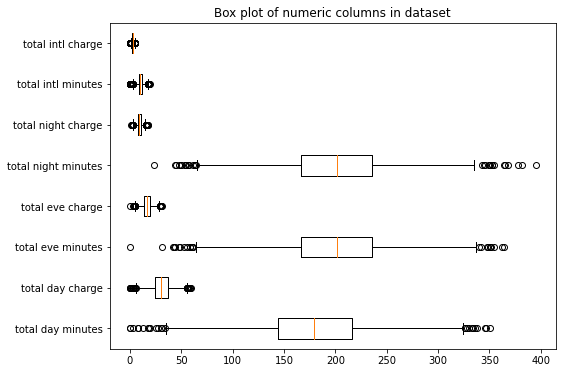

In [6]:
 # Checking for outliers
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
plt.figure(figsize=(8,6))
plt.boxplot(df[numeric_columns].values, vert=False)
plt.title("Box plot of numeric columns in dataset")
plt.yticks(range(1, len(numeric_columns) + 1), numeric_columns)
plt.show()

**The dataset does not contain outliers; however, there are variations in the scales of the columns that require addressing during preprocessing**

##### Converting the object to int/ float

##### Methods to use include

##### 1. For binary categorical data, I will use the .map() function

##### 2. For more than two categories I will use pd.get dummies

In [7]:
#  converting international plan  by use of map fuction
df['international plan'] = df['international plan'].map({'no': 0, 'yes':1})

In [8]:
# converting voice mail  using map fuction
df['voice mail plan'] = df['voice mail plan']. map({'no': 0, 'yes': 1})

In [9]:
# Converting  churn 
df['churn'] = df['churn'].map({False: 0, True:1})

In [10]:
# What to extract area code from phone number
df['area_code'] = df['phone number'].str[:3].astype(int)

### Dealing with missing values

In [11]:
# Checking for missing values
df.isna().sum().any()

False

In [12]:
# checking for duplicates
df.duplicated().any()

False

In [13]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
area_code                   int32
dtype: object

In [14]:
df.drop('phone number', axis = 1).head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,382
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,371
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,358
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,375
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,330


## Exploratory Data Analysis (EDA)
Exploring the dataset to uncover deeper insights and understand the underlying patterns within our data

## Univariate Analysis

 ### How many customers churned and by what percentage

In [15]:
print(df['churn'].value_counts())
print()
print(df['churn'].value_counts(normalize=True))

0    2850
1     483
Name: churn, dtype: int64

0    0.855086
1    0.144914
Name: churn, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='count'>

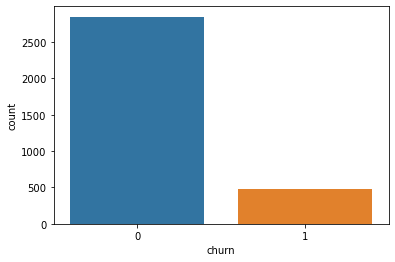

In [16]:
sns.countplot(x='churn', data=df)




### Findings
The dataset includes 2,850 customers who did not churn, accounting for approximately 86% accuracy in predicting non-churn cases.

A smaller group of 483 customers churned (left the company), representing about 15% of the total customer base.

These findings highlight a class imbalance issue, where the churned class is underrepresented. To address this imbalance and improve model performance, implementing SMOTE (Synthetic Minority Over-sampling Technique) to resample the minority class is recommended

###  Distribution of customers with international plan 

<AxesSubplot:xlabel='international plan', ylabel='count'>

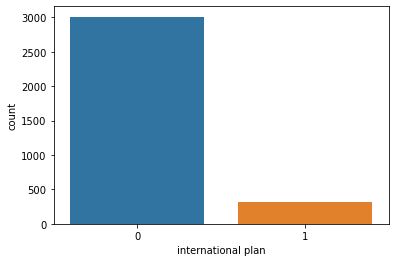

In [17]:
 sns.countplot(x='international plan', data=df)


Most customers in the telecom company did not have an international plan.

###  How many customers had  voice mail plan

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

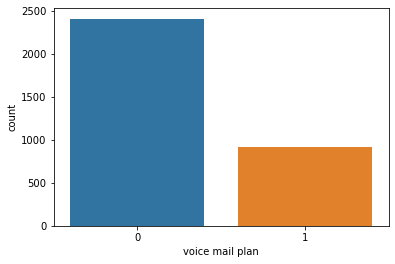

In [18]:
sns.countplot(x='voice mail plan', data=df)

Many customers did not have the voicemail plan.

 #### Plotting histograms for customer service calls, total day minutes, and total day charge to explore their distributions visually.

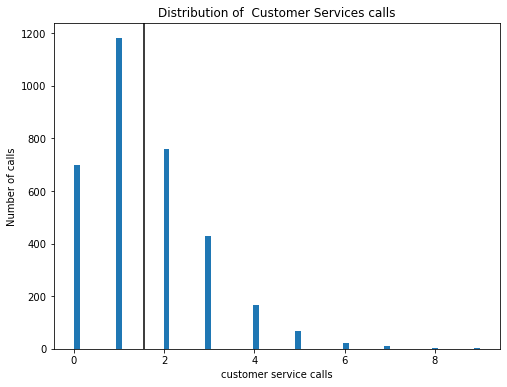

In [19]:
# Defining a fuction
def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(8,6))
    # Plot histogram
    ax.hist(data, bins='auto')
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plot_histogram(
    df,
    "customer service calls",
    "Distribution of  Customer Services calls",
    "customer service calls",
    "Number of calls"
)

### What is the average number of calls made by customers

In [20]:
print(df['customer service calls'].mean())
print()
print(df['customer service calls'].std())
print()
print(df['customer service calls'].median())

1.5628562856285628

1.3154910448664767

1.0


The distribution of customer service calls is skewed and not normally distributed. On average, customers made around 2 calls per day. A total of 1,200 customers were included in the analysis

### Distribution on total day minutes

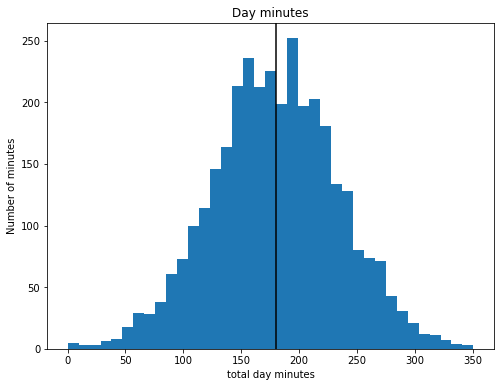

In [21]:
plot_histogram(df,'total day minutes','Day minutes','total day minutes', 'Number of minutes')

In [22]:
print(df['total day minutes'].mean())
print(df['total day minutes'].std())
print(df['total day minutes'].median())

179.77509750975094
54.46738920237137
179.4


The distribution of total minutes spent by customers follows a normal distribution. On average, most customers spend approximately 180 minutes per day.

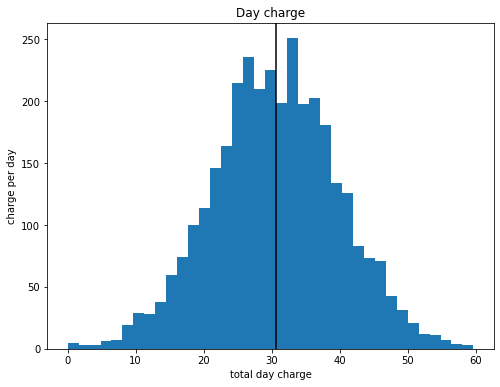

In [23]:

plot_histogram(df, 'total day charge','Day charge', 'total day charge', 'charge per day')


The charges are also normally distributed, with an average charge of approximately khs31 per day incurred by customers for their minutes and calls

In [24]:
df['total day charge'].mean()

30.562307230723075

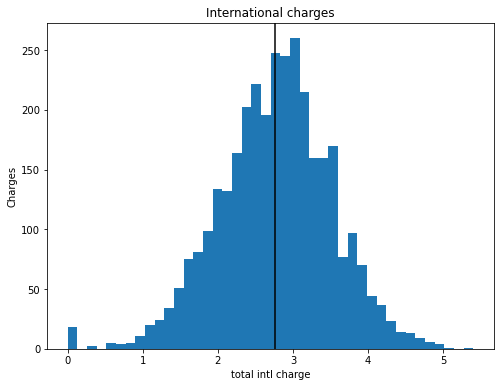

In [25]:
plot_histogram(df, 'total intl charge','International charges', 'total intl charge','Charges')

The distribution of spending on international calls follows a normal pattern. On average, customers spent approximately 2.8 units on international calls. This indicates that most customers did not make many international calls, as the average spending was relatively low

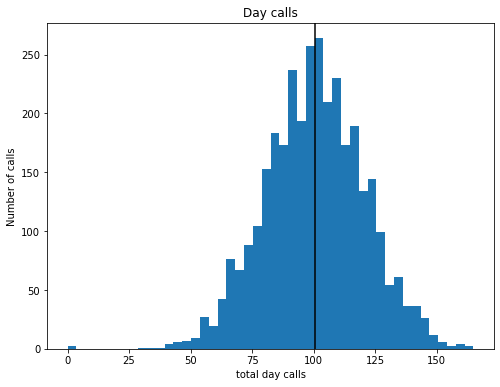

In [26]:
plot_histogram(df,'total day calls', 'Day calls', 'total day calls', 'Number of calls')


The distribution is normally shaped, with the majority of customers making approximately 100 calls per day on average.

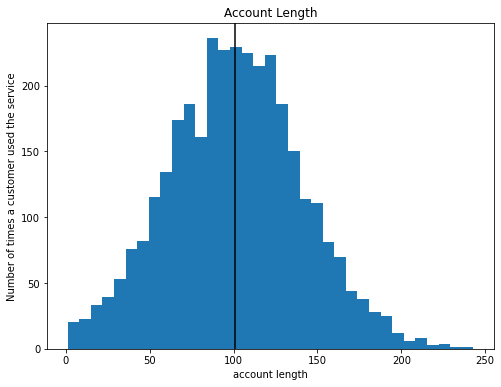

In [27]:
plot_histogram(df,'account length','Account Length','account length', 'Number of times a customer used the service')

The distribution is normally shaped, with customers using the service an average of 100 times

### Explore Correlation
Let's explore the correlation to identify which features have a strong impact on customer churn

In [28]:
df.corr()['churn'].sort_values(ascending= False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
area_code                 0.005836
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


### Bivariate Analysis
Based on the correlation analysis:

We will plot a box plot to explore the relationship between churn and highly correlated features (positive and negative).
The international plan shows a strong positive correlation with churn, while the voicemail plan exhibits a strong negative correlation.
Let's use box plots to gain insights into these relationships.

Text(0, 0.5, 'churn')

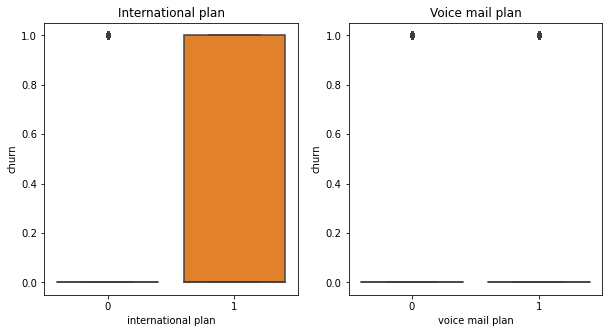

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["international plan"],
    y=df["churn"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["voice mail plan"],
    y=df["churn"],
    ax=ax2
)

# Customize labels
ax1.set_title("International plan")
ax1.set_xlabel("international plan")
ax1.set_ylabel("churn")
ax2.set_title("Voice mail plan")
ax2.set_xlabel("voice mail plan")
ax2.set_ylabel("churn")


The International plan had a significant effect on customers stopping the service.

Conversely, the voicemail feature showed no effect on customer churn

### Feature Engineering and Exploring New Features
Based on our previous analysis, we identified certain features that could be combined or engineered to gain deeper insights from our data. Let's proceed to create new features that can enhance our understanding of customer behavior and churn patterns.

In [30]:
# Find  the total data using per day
df['data_usage'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

In [31]:
# Renaming total day minutes and total day calls 
df['day_minutes'] = df['total day minutes']
df['day_calls']   = df['total day calls']

In [32]:
# Creating a column to show the total day charge
df['daily_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

In [33]:
df.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'area_code', 'data_usage',
       'day_minutes', 'day_calls', 'daily_charge'],
      dtype='object')

In [34]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code,data_usage,day_minutes,day_calls,daily_charge
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,10.0,3,2.70,1,0,382,707.2,265.1,110,72.86
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,13.7,3,3.70,1,0,371,611.5,161.6,123,55.54
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,12.2,5,3.29,0,0,358,527.2,243.4,114,59.00
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,6.6,7,1.78,2,0,375,558.2,299.4,71,65.02
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,10.1,3,2.73,3,0,330,501.9,166.7,113,49.36


## DIstribution of Churn vs voice mail plan

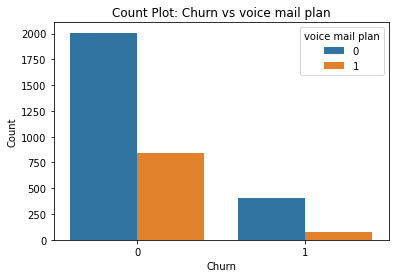

In [35]:
#  
sns.countplot(data=df, x='churn', hue='voice mail plan')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot: Churn vs voice mail plan')

# Show the plot
plt.show()

Most customers, approximately 2000, did not have a voicemail plan, which was associated with low churn rates. Conversely, very few customers had the voicemail plan, and among them, churn was also relatively low. 

### Distribution between churn and  Data usage

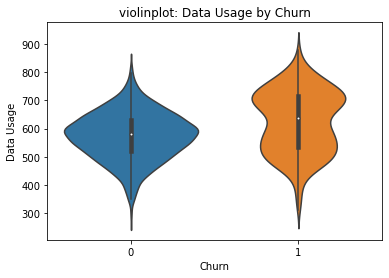

In [36]:
sns.violinplot(data=df, x='churn', y='data_usage')
plt.xlabel('Churn')
plt.ylabel('Data Usage')
plt.title('violinplot: Data Usage by Churn')
plt.show()

**Based on the analysis:**

Customers with a high data plan were more likely to leave the company.

Customers with at least minimal data usage tended to stay with the service.

Among customers, those with high data usage were more likely to leave compared to those with lower data usage

### Distribution of churn vs data plan

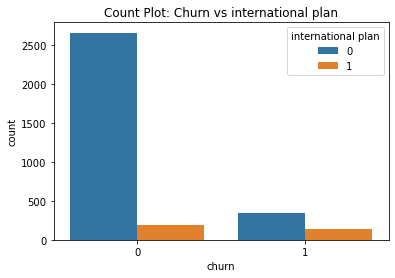

In [37]:
sns.countplot(data=df, x='churn', hue='international plan')
plt.xlabel('churn')
plt.ylabel('count')
plt.title('Count Plot: Churn vs international plan')
plt.show()

**Findings:**

Approximately 3,000 customers who did not have an international plan did not churn.

About 500 customers with an international plan left the service.

Encouraging customers to adopt an international plan could potentially lead to increased profitability for the business.

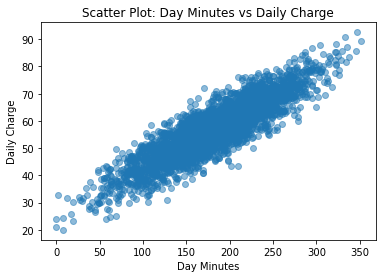

In [38]:
plt.scatter(df['day_minutes'], df['daily_charge'], alpha=0.5)
plt.xlabel('Day Minutes')
plt.ylabel('Daily Charge')
plt.title('Scatter Plot: Day Minutes vs Daily Charge')
plt.show()

**Analysis Summary:**

There is a strong positive correlation between average day minutes and daily charges.

As the average day minutes increase, the monthly charge also increases.

This relationship suggests that an increase in minutes spent correlates with higher daily charges from the telecom company, which could significantly impact customer churn

### Distribution  of customer calls vs churn

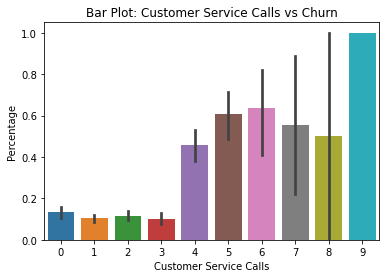

In [39]:
sns.barplot(data=df, x='customer service calls', y='churn')
plt.xlabel('Customer Service Calls')
plt.ylabel('Percentage')
plt.title('Bar Plot: Customer Service Calls vs Churn')
plt.show()

**Analysis Summary:**
A high percentage of customers who made frequent customer service calls ended up leaving the service.

Conversely, only a low percentage (10%) of customers made customer service calls.

Business owners should investigate why customers who made many customer service calls ended up leaving the service to identify potential reasons for customer dissatisfaction.

## Multivariate Analysis

**Key Focus Areas for Analysis:**

Analyzing the relationship between international plan, data usage, and churn.

Investigating customer service calls, day minutes, and their impact on churn.

Examining the relationship between daily charge, data plan, and churn

In [40]:
# Lets creat a fuction to iterite through 
def barplot(cat_var1, num_var, cat_var2):
    sns.barplot(data = df, x = cat_var1, y = num_var, hue = cat_var2, errwidth = 0) 
    plt.ylabel('{}'.format(num_var.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_var1.replace('_', ' ').capitalize()));

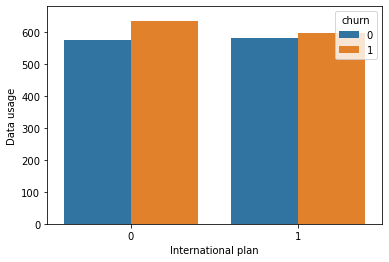

In [41]:
barplot('international plan', 'data_usage', 'churn')


**Findings:**
Customers who did not have an international plan and had high data usage tended to leave the service.

Similarly, customers with an international plan and high data usage also tended to leave the service.


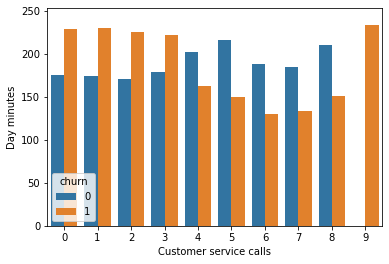

In [42]:
barplot('customer service calls','day_minutes', 'churn')


**Findings:**

Most customer service calls between 0 to 4 and high day minutes usage in a day were associated with customer churn.

Conversely, when the number of customer service calls was between 4 to 8 and the day minutes decreased, customers were less likely to churn.

However, making customer service calls 9 times or more was strongly associated with churning.

These findings suggest that a higher number of customer service calls tends to lead to churn, but if the calls are moderate (4 to 8), customers are less likely to churn.

In [43]:
#barplot('day_calls','customer service calls', 'churn')

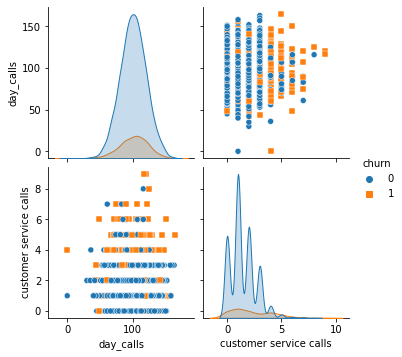

In [44]:
# Create a pair plot
sns.pairplot(df, vars=['day_calls', 'customer service calls'], hue='churn', markers=['o', 's'])
plt.show()

<AxesSubplot:xlabel='day_calls', ylabel='customer service calls'>

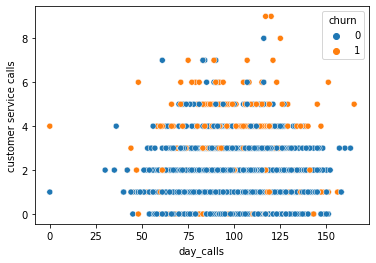

In [45]:
sns.scatterplot(x='day_calls', y='customer service calls', hue='churn', data=df)

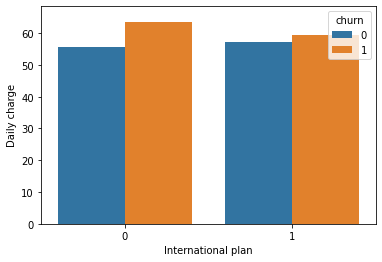

In [46]:
barplot('international plan', 'daily_charge', 'churn')

<AxesSubplot:xlabel='daily_charge', ylabel='data_usage'>

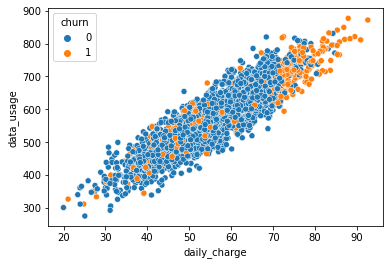

In [47]:

sns.scatterplot(x='daily_charge', y='data_usage', hue='churn', data=df)

**Findings:**

As data usage increases, the daily charge also increases.

It can be concluded that many customers churned due to their high daily charges associated with daily data usage.

This suggests that if customers spend fewer minutes on calls, their charges will be smaller.

There is a strong correlation observed between data usage and daily spending.

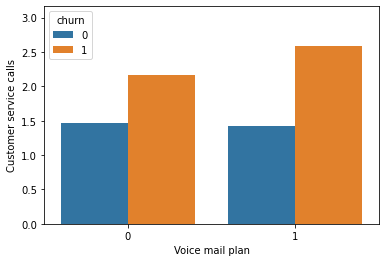

In [48]:
barplot('voice mail plan', 'customer service calls', 'churn')

**Findings:**

Customers with a voicemail plan who made many customer service calls tended to leave the service.

Similarly, customers without a voicemail plan who made many customer service calls also left.

Business owners should consider whether offering a voicemail plan is profitable based on its impact on customer retention.

### Correlation Matrix 

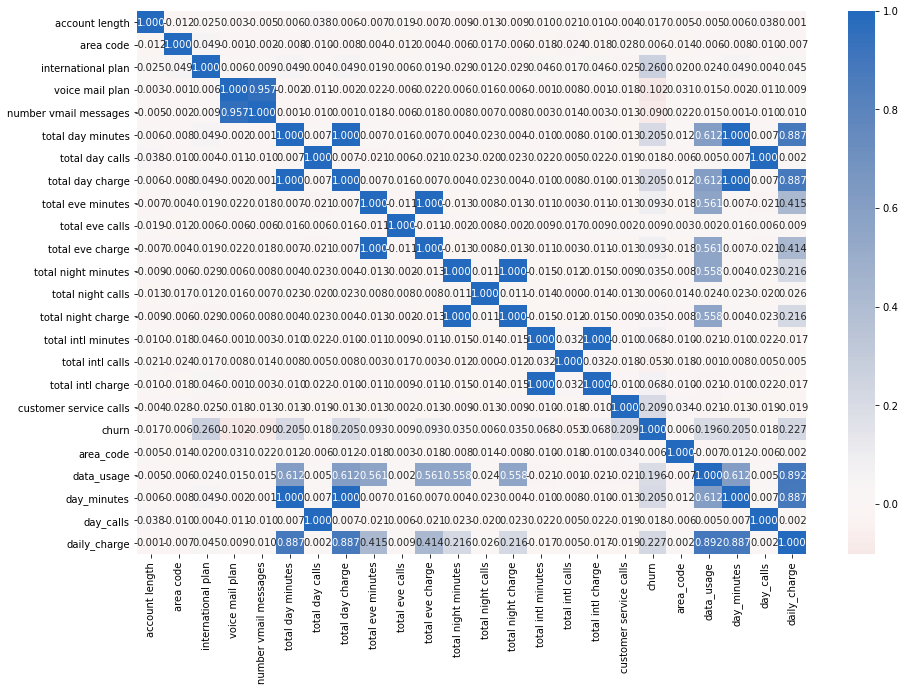

In [49]:
# Threshold of 0.5 to avoid multicolinearity
plt.figure(figsize = [15, 10])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [50]:
df.corr()['churn'].sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
daily_charge              0.226962
customer service calls    0.208750
day_minutes               0.205151
total day minutes         0.205151
total day charge          0.205151
data_usage                0.196457
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
day_calls                 0.018459
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
area_code                 0.005836
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

## Data preprocessing,
####  To scale my data  using standard scaler

In [51]:
# Let select the columns i my need to use
selected_columns = ['international plan','daily_charge','customer service calls','churn','day_minutes','data_usage','day_calls']


In [52]:
# Creating a dataframe of columns to use
new_df = df[selected_columns]
new_df.head()

,international plan,daily_charge,customer service calls,churn,day_minutes,data_usage,day_calls
0,0,72.86,1,0,265.1,707.2,110
1,0,55.54,1,0,161.6,611.5,123
2,0,59.00,0,0,243.4,527.2,114
3,1,65.02,2,0,299.4,558.2,71
4,1,49.36,3,0,166.7,501.9,113


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   int64  
 1   daily_charge            3333 non-null   float64
 2   customer service calls  3333 non-null   int64  
 3   churn                   3333 non-null   int64  
 4   day_minutes             3333 non-null   float64
 5   data_usage              3333 non-null   float64
 6   day_calls               3333 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 182.4 KB




#####  Declaring my variables , X and y

In [54]:
X = new_df.drop('churn', axis=1)
y = new_df['churn']
# Let me split my data into traing and testing by usin train_test_split from sklearn with test_size= 0.2,randomstate=42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


### Building my first model with logistic regression


###   Use pipeline 

In [55]:
# Steps for my pipeline 
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(fit_intercept=False, solver='liblinear', random_state=42))
])

In [56]:
# To confirm 
pipeline_1

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

In [57]:
# Lets fit on traing data
pipeline_1.fit(X_train, y_train)
# Lets make prediction
y_pred = pipeline_1.predict(X_test)
# Lets score the training 
pipeline_1.score(X_train, y_train)

0.700675168792198

In [58]:
# Scoring it on  test data(unseen)
pipeline_1.score(X_test, y_test)

0.6956521739130435

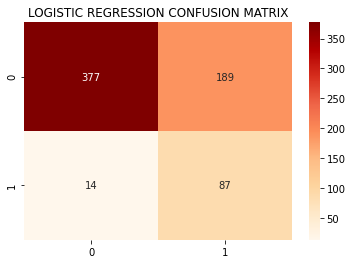

In [59]:
# Lets plot a confusion matrix to see how it perfirmed
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX");

#### Lets plot  a classifiction report to check how it performed

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       566
           1       0.32      0.86      0.46       101

    accuracy                           0.70       667
   macro avg       0.64      0.76      0.62       667
weighted avg       0.87      0.70      0.74       667



**Summary from the Report and Confusion Matrix**:

The model accurately predicted that 87 customers churned, and indeed they did churn (True Positive).

The model accurately predicted that 377 customers did not churn, and indeed they did not churn (True Negative).

The model incorrectly predicted that 189 customers would churn, but they did not actually churn (False Positive).

Lastly, the model incorrectly predicted that 14 customers would not churn, but they actually did churn (False Negative

In [61]:
!pip install --upgrade scikit-learn



In [62]:
# Lets plot roc curve
#from sklearn.metrics import plot_roc_curve

#plot_roc_curve(pipeline_1, X_test, y_test)

## Building my second model with decision tree

In [63]:
# Creating a pipeline, for a decision and use cross validation
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42,))
])

In [64]:
pipe.fit(X_train, y_train)
# Lets make prediction
y_pred =pipe.predict(X_test)
#Lets cross validate
scores = cross_val_score(pipe, X_train,y_train, cv=5)
scores


array([0.89138577, 0.88180113, 0.90243902, 0.85365854, 0.87242026])

In [65]:
np.mean(scores)

0.8803409434267202

In [66]:
# Lets test it on unseen data( testing data, the prediction must be the same ie 0.88)
pipe.score(X_test, y_test)

0.8875562218890555


The Decision Tree model demonstrated superior performance compared to Logistic Regression

### Building my Third model with Random Forest with Hyperparametre Tuning

In [67]:
# Creating a more complex model with hyperparameters and tuning
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(max_features= 'sqrt',max_samples=0.5, random_state=42))
])
random_forest_model = pipe3.named_steps['rf'] #


In [68]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_samples=0.5, random_state=42))])

In [69]:
print(pipe3.named_steps.keys())# Checking on keys to help me access important fetures

dict_keys(['scaler', 'rf'])


In [70]:
# Access feature importances from the RandomForestClassifier
feature_importances = pipe3.named_steps[ 'rf'].feature_importances_

In [71]:
# Lets make prediction
y_pred = pipe3.predict(X_test)
# Lets score it on test data
accuracy = pipe3.score(X_test, y_pred)
pipe3.score(X_train, y_train)


0.9714928732183046

In [72]:
# Lets cross validate to avoid overfitting
scores = cross_val_score(pipe3, X_train, y_train, cv=5)
scores

array([0.92322097, 0.92120075, 0.91181989, 0.89493433, 0.92120075])

In [73]:
# The mean of those 5 different model
np.mean(scores)

0.9144753392218451

In [74]:
# Lets check how it performed on testing data
pipe3.score(X_test, y_test)

0.9280359820089955

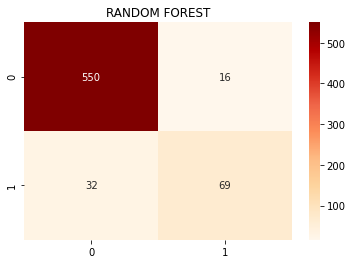

In [75]:
# Lets plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("RANDOM FOREST");

Our model is performing well with no signs of overfitting, and the Random Forest classifier can accurately predict approximately 93% of class 0, indicating customers who will not churn.

This statement highlights the positive performance of your Random Forest model in accurately predicting customers who will not churn (class 0) without overfitting. It reflects a strong capability of the model to generalize well on unseen data.

### Feature Importance

In [76]:
# Lets check on the features they effected customers  to churn
random_forest_model = pipe3.named_steps['rf']
feature_importance = {name: score
                     for name, score
                         in zip(X_test.columns,random_forest_model.feature_importances_)
                     }
feature_importance

{'international plan': 0.0703309486107111,
 'daily_charge': 0.30602316051102435,
 'customer service calls': 0.17034538901266824,
 'day_minutes': 0.18141827512055286,
 'data_usage': 0.16831760714406574,
 'day_calls': 0.10356461960097778}

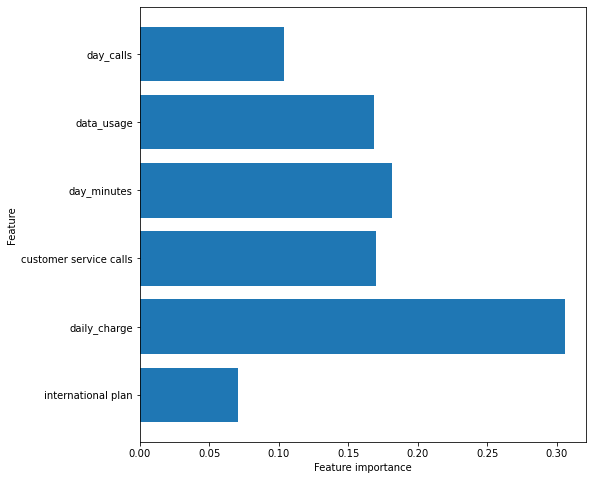

In [77]:
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe3.named_steps['rf'], X_train)
plt.show()

**Key Features Impacting Customer Churn:**

.`Daily Charge`: The amount charged to customers for their daily usage significantly influences churn rates.

.`Day Minutes Spent by a Customer`: Higher usage of daytime minutes by customers correlates with increased churn.

.`Customer Service Calls`: Excessive calls to customer service are associated with higher churn rates.

.`Data Usage`: Usage of data services also plays a role in predicting customer churn.

.`Day Calls`: The number of daytime calls made by customers may impact churn, although to a lesser extent.

.`International Plan`: The presence or absence of an international plan can be a contributing factor to customer churn.

## VotingClassifier
#### To check on how the three model performed and compare it with random forest

In [78]:
# :Lets check the average perform on the three models
avg = VotingClassifier(estimators=[
    ('pipeline_1', pipeline_1),
    ('pipe', pipe),
    ('pipe3', pipe3)
])
avg.fit(X_train, y_train)

VotingClassifier(estimators=[('pipeline_1',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('logreg',
                                               LogisticRegression(fit_intercept=False,
                                                                  random_state=42,
                                                                  solver='liblinear'))])),
                             ('pipe',
                              Pipeline(steps=[('ss', StandardScaler()),
                                              ('dt',
                                               DecisionTreeClassifier(random_state=42))])),
                             ('pipe3',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('rf',
                                               RandomForestClassifier(max_samples=0.5,
                                                                      random_state=42))]))])

In [79]:
scores = cross_val_score(estimator=avg,X=X_train, y=y_train, cv=5)
scores

array([0.91573034, 0.90619137, 0.90806754, 0.87054409, 0.90994371])

In [80]:
np.median(scores)

0.9080675422138836

In [81]:
# Lets check on testing data, it should be as the one above
avg.score(X_test, y_test)

0.9220389805097451

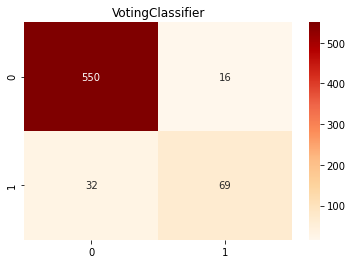

In [82]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("VotingClassifier");

####  Random Forest still performs better as compared to VotingClassifier  

## Dealing with class imbalance
**To address the class imbalance issue, we'll utilize the Synthetic Minority Over-sampling Technique (SMOTE) with a ratio of 0.8. By setting the ratio to 0.8, SMOTE will create synthetic samples for the minority class to balance the class distribution.**

In [83]:
# checking on y_train value counts
y_train.value_counts()

0    2284
1     382
Name: churn, dtype: int64

In [84]:
# Using smote to resample minority class
sm = SMOTE(sampling_strategy=0.8, random_state=42)

In [85]:
# Fitting on training data and checking on value counts
X_train_resmp, y_train_resmp = sm.fit_resample(X_train, y_train)

y_train_resmp.value_counts()

0    2284
1    1827
Name: churn, dtype: int64

### `imblearn`pipeline

In [86]:
# Using imblearn pipeline
imb_pipe= ImPipeline([
    ('ss', StandardScaler()),
    ('sm', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier())
])

In [87]:
imb_pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('sm', SMOTE(random_state=42)),
                ('rf', RandomForestClassifier())])

In [88]:
imb_pipe.score(X_train, y_train)

1.0

In [89]:
# Lets cross validate to avoid overfitting 
scores = cross_val_score(imb_pipe, X_train, y_train, cv=10)

In [90]:
np.mean(scores)

0.890070682323787

In [91]:
imb_pipe.score(X_test, y_test)

0.8980509745127436

In [92]:
# Lets make predictions
y_pred = imb_pipe.predict(X_test)

### Final model Evaluation

In [93]:
final_model = imb_pipe

In [94]:
#pip install --upgrade scikit-learn


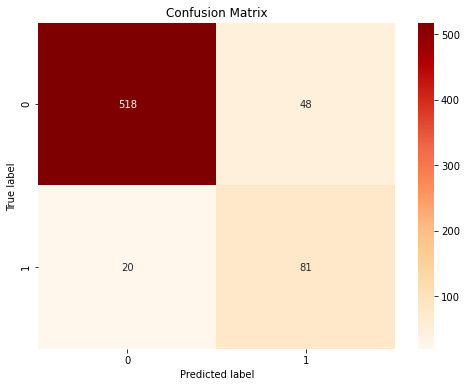

In [95]:
# Assuming y_test and y_pred are your actual test labels and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [96]:
y_hat = final_model.predict(X_test)

In [97]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 1)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat), 3)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat), 1)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat), 1)}.
""")


Our final model's accuracy on the test set is 0.9. 

Our final model's recall on the test set is 0.802 

Our final model's precision on the test set is 0.6 

Our final model's f1-score on the test is 0.7.



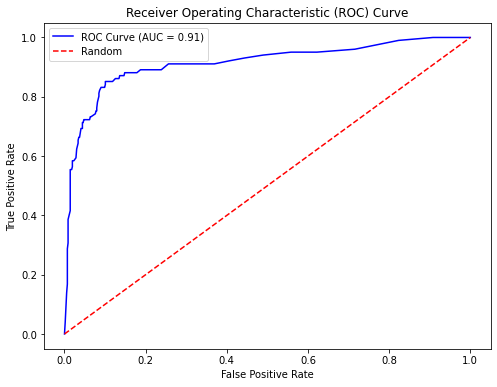

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Replace `final_model.predict_proba(X_test)[:, 1]` with your actual predicted probabilities
y_proba = final_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**Insights**

An AUC score of 91% suggests that the model has a strong ability to differentiate between customers who churn and those who don't.

The true positive rate (sensitivity) is high, meaning that the model correctly identifies a large proportion of actual churn cases as churn.

The false positive rate (1 - specificity) is relatively low, indicating that the model has a low rate of falsely predicting churn when the customer actually does not churn.

### Model Interpretation

This model has 90% accuracy, meaning that it assigns the correct label 90% of the time

This is definitely an  improvement over a "dummy" model, which would have about 86% accuracy and And our baseline model

If our model labels  churn as 1, there is about an 76%(Recall) chance that it really is class 1.

If a given churn of customer  really is a class 1, there is about a chance that our model  will label it correctly.

If the business really cared about avoiding "false negatives" ( meaning saying no churn , when actually is) more so than
 avoiding "false positives" (labeling churn when there is actually no churn), then we might want to adjust the decision threshold  on this and  evaluate the model by recall**


### Conclusions
.Customer churn in the telecommunication company was notably influenced by **daily charges and high monthly charges.**

. A high volume of customer service calls made by customers correlated with churn, emphasizing the need for investigation and resolution.

. Business owners should prioritize monitoring and optimizing features such as daily charges, customer service call frequency, and data usage to proactively manage churn


### Recommendations
To improve customer retention and satisfaction, prioritize enhancing customer service call experiences.

Review and adjust charges imposed on customers to ensure they are competitive and aligned with customer expectations.

Encourage customers to opt for international plans to gain insights into usage patterns that contribute to customer satisfaction and retention.

### Next Steps
.`Address Data Imbalance`: Take steps to balance the dataset for more reliable model training and performance evaluation.

.`Review Daily Charges`: Conduct a thorough review of daily charges to ensure they are competitive and aligned with customer expectations.

.`Promote International Plans`: Encourage customers to opt for international plans to increase revenue and gain valuable insights into usage patterns for better customer retention strategies.


In [106]:
# Saving the model
with open('random_forest.pkl','wb')as f:
    joblib.dump(final_model, f)